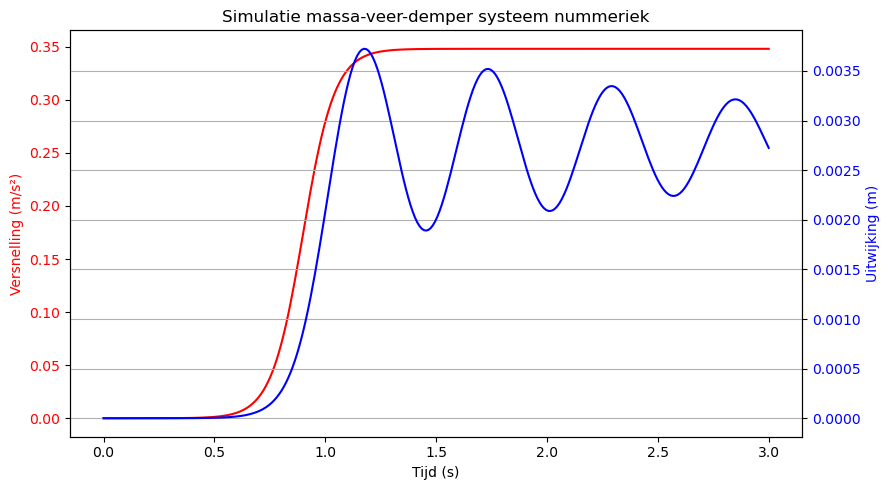

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import csv

m = 0.872  # massa (kg)
k = 110   # veerconstante (N/m)
c = 0.8  # dempingconstante (Ns/m)

with open('versnellingsprofiel_glad.csv') as file:
    reader = csv.reader(file)
    next(reader)  # sla kopregel over
    data = np.array([[float(r[0]), float(r[1])] for r in reader])
    tijd, a_input = data[:, 0], data[:, 1]

dt = tijd[1] - tijd[0]
x = np.zeros_like(tijd)
v = np.zeros_like(tijd)

for i in range(1, len(tijd)):
    a_net = a_input[i] - (c/m) * v[i-1] - (k/m) * x[i-1]
    v[i] = v[i-1] + dt * a_net
    x[i] = x[i-1] + dt * v[i]

fig, ax1 = plt.subplots(figsize=(9, 5))

ax1.set_xlabel('Tijd (s)')
ax1.set_ylabel('Versnelling (m/s²)', color='red')
ax1.plot(tijd, a_input, color='red', label='Versnelling a(t)')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Uitwijking (m)', color='blue')
ax2.plot(tijd, x, color='blue', label='Uitwijking x(t)')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Simulatie massa-veer-demper systeem nummeriek')
plt.grid()
plt.tight_layout()
plt.show()

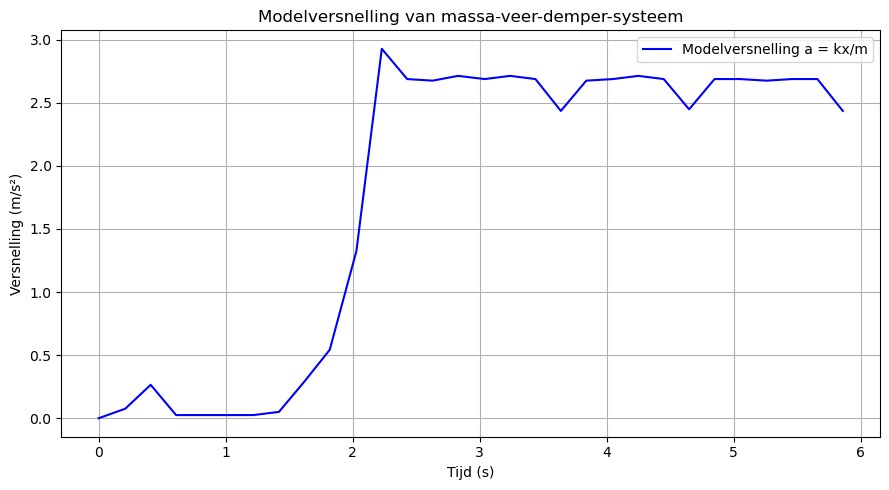

    tijd (s)   x (m)  v (m/s)  a_model (m/s²)
0       0.00  0.0007  0.00000         0.00000
1       0.21  0.0006 -0.00048         0.07569
2       0.41  0.0021  0.00714         0.26491
3       0.61  0.0002 -0.00905         0.02523
4       0.81  0.0002  0.00000         0.02523
5       1.01  0.0002  0.00000         0.02523
6       1.22  0.0002  0.00000         0.02523
7       1.42  0.0004  0.00095         0.05046
8       1.62  0.0023  0.00905         0.29014
9       1.82  0.0043  0.00952         0.54243
10      2.03  0.0105  0.02952         1.32454
11      2.23  0.0232  0.06048         2.92661
12      2.43  0.0213 -0.00905         2.68693
13      2.63  0.0212 -0.00048         2.67431
14      2.83  0.0215  0.00143         2.71216
15      3.04  0.0213 -0.00095         2.68693
16      3.24  0.0215  0.00095         2.71216
17      3.44  0.0213 -0.00095         2.68693
18      3.64  0.0193 -0.00952         2.43463
19      3.84  0.0212  0.00905         2.67431
20      4.05  0.0213  0.00048     

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Parameters van het systeem
m = 0.872  # massa in kg
k = 110   # veerconstante in N/m
c = 0.80   # dempingconstante in Ns/m

# Inlezen van tijd en uitwijking x(t) uit CSV bestand
with open('meting2NC.csv') as file:
    reader = csv.reader(file) 
    next(reader)  # sla kopregel over
    data = np.array([[float(r[0]), float(r[1])] for r in reader])
    tijd, x_input = data[:, 0], data[:, 1]

# Initialisatie
dt = tijd[1] - tijd[0]
x = x_input - 0.073  # uitwijking
v = np.zeros_like(tijd)  # snelheid
a_sensor = np.zeros_like(tijd)  # versnelling via model (a = kx/m)

# Berekening van snelheid v(t)
for i in range(1, len(tijd)):
    v[i] = (x[i] - x[i-1]) / dt

# Berekening van modelversnelling a_sensor(t)
for i in range(1, len(tijd)):
    a_sensor[i] = (k * x[i]) / m

# Plotten van modelversnelling
plt.figure(figsize=(9, 5))
plt.plot(tijd, a_sensor, color='blue', label='Modelversnelling a = kx/m')
plt.xlabel('Tijd (s)')
plt.ylabel('Versnelling (m/s²)')
plt.title('Modelversnelling van massa-veer-demper-systeem')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Exporteren van resultaten naar CSV
df = pd.DataFrame({
    "tijd (s)": np.round(tijd, 5),
    "x (m)": np.round(x, 5),
    "v (m/s)": np.round(v, 5),
    "a_model (m/s²)": np.round(a_sensor, 5)
})

df.to_csv("output_versnellingssensor.csv", index=False, sep=';')
print(df)
